In [63]:
import pickle
from root_pandas import read_root
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('classic')
plt.rc('figure', facecolor='w', figsize=(10,10))
plt.rc('axes', labelsize=48)
plt.rc('axes', titlesize=24)

In [5]:
runs = ['B', 'C', 'D', 'E', 'F', 'G', 'H']
df_muon_list = []
df_electron_list = []
for run in runs:
    df_muon_list.append(read_root('../data/step3_vbf_bdt/output_mumug_2016_flat.root', 'muon_2016'+run))
    df_electron_list.append(read_root('../data/step3_vbf_bdt/output_elelg_2016_flat.root', 'electron_2016'+run))
df_mu_gluglu = read_root('../data/step3_vbf_bdt/output_mumug_2016_flat.root', 'hzg_gluglu').astype('float')
df_mu_vbf = read_root('../data/step3_vbf_bdt/output_mumug_2016_flat.root', 'hzg_vbf').astype('float')
df_muon = pd.concat(df_muon_list).astype('float')
df_ele_gluglu = read_root('../data/step3_vbf_bdt/output_elelg_2016_flat.root', 'hzg_gluglu').astype('float')
df_ele_vbf = read_root('../data/step3_vbf_bdt/output_elelg_2016_flat.root', 'hzg_vbf').astype('float')
df_electron = pd.concat(df_electron_list).astype('float')
df_zjets_mu = read_root('../data/step3_vbf_bdt/output_mumug_2016_flat.root', 'zjets_m-50_amc').query('not vetoDY')
df_zjets_ele = read_root('../data/step3_vbf_bdt/output_elelg_2016_flat.root', 'zjets_m-50_amc').query('not vetoDY')
df_zjets = pd.concat([df_zjets_mu, df_zjets_ele]).astype('float')
df_zg_mu = read_root('../data/step3_vbf_bdt/output_mumug_2016_flat.root', 'zg_llg').astype('float')
df_zg_ele = read_root('../data/step3_vbf_bdt/output_elelg_2016_flat.root', 'zg_llg').astype('float')
df_zg = pd.concat([df_zg_mu, df_zg_ele]).astype('float')

In [65]:
#condition = 'isDijetTag == 1.'
def make_data_mc_plot(feature, nbins, xrange, xlabel, title, channel):
#feature = 'photonOneR9'
#nbins = 40
#xrange = [0., 1.]
    labels = ['Z + jets', 'SM $\sf Z\gamma$']
    fig, ax = plt.subplots()
    if channel == 'muon':
        dataframes = [df_zjets_mu, df_zg_mu]
        df_data = df_muon
    else: 
        dataframes = [df_zjets_ele, df_zg_ele]
        df_data = df_electron
#dataframes = [df_zjets_mu.query(condition), df_zg_mu.query(condition)]
    stack_data = []
    stack_weights = []
    colors = ['r', 'g']
    for dataframe in dataframes:
        stack_data.append(dataframe[feature])
        stack_weights.append(dataframe['eventWeight']*dataframe['genWeight'])
    stack, bins, p = ax.hist(stack_data,
                             #bins      = int(lut_entry.n_bins),
                             bins = nbins,
                             #bins      = my_bins, # if bayesian binning
                             #range     = (lut_entry.xmin, lut_entry.xmax),
                             range     = xrange,
                             color     = colors,
                             alpha     = 1.,
                             linewidth = 0.5,
                             stacked   = True,
                             histtype  = 'stepfilled',
                             weights   = stack_weights,
                             label = labels
                            )
    y, bins = np.histogram(df_data[feature], bins=nbins, range=xrange)
    #y, bins = np.histogram(df_muon.query(condition)[feature], bins=nbins, range=xrange)
    x = (bins[1:] + bins[:-1])/2.
    yerr = np.sqrt(y)
    ax.errorbar(x, y, yerr=yerr, fmt='ko', capsize=9, elinewidth=2, label='data')
    ax.set_xlim(xrange);
    ax.set_ylim(0, ymax=ax.get_ylim()[1]*1.2);
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Entries / bin')
    ax.legend();
    plt.tight_layout();
    plt.savefig('data-mc/{0}_{1}'.format(title, channel), dpi=500);
    plt.close();

In [68]:

f_dict = {'zgLittleTheta': {'bins': 40, 'xrange': [0., 1.], 'xlabel': r'$\sf \cos \theta$', 'title': 'cos_theta'}, 
          'zgBigTheta': {'bins': 40, 'xrange': [0., 1.], 'xlabel': '$\sf \cos \Theta$', 'title': 'cos_Theta'},
          'photonOneR9': {'bins': 40, 'xrange': [0., 1.], 'xlabel': '$\sf R9_{\gamma}$', 'title': 'r9'},
          'llgPtOverM': {'bins': 40, 'xrange': [0., 1.], 'xlabel': '$\sf p_{T}/m$', 'title':'pt_over_m'},
          'leptonOneEta': {'bins': 40, 'xrange': [-2.4, 2.4], 'xlabel': '$\sf \eta_{1}$', 'title':'1ep1_eta'},
          'leptonTwoEta': {'bins': 40, 'xrange': [-2.4, 2.4], 'xlabel': '$\sf \eta_{2}$', 'title':'1ep2_eta'},
          'photonOneEta': {'bins': 40, 'xrange': [-2.5, 2.5], 'xlabel': '$\sf \eta_{\gamma}$', 'title':'photon_eta'},
          'zgPhi': {'bins': 40, 'xrange': [-2.4, 2.4], 'xlabel': '$\sf \phi$', 'title':'zg_phi'},          
          'photonOneMVA': {'bins': 40, 'xrange': [0.2, 1.], 'xlabel': 'photon MVA', 'title':'photon_mva'},
          'phores': {'bins': 40, 'xrange': [0., 0.2], 'xlabel': 'photon resolution', 'title':'photon_res'},
          'lPhotonDRMin': {'bins': 40, 'xrange': [0.4, 5.], 'xlabel': 'DR min', 'title':'dr_min'}, 
          'lPhotonDRMax': {'bins': 40, 'xrange': [0.4, 5.], 'xlabel': 'DR max', 'title':'dr_max'},          
         }


In [69]:
f_list = ['zgLittleTheta', 'zgBigTheta', 'llgPtOverM', 'leptonOneEta', 'leptonTwoEta',
          'photonOneEta', 'zgPhi', 'photonOneR9', 'photonOneMVA', 'phores', 
          'lPhotonDRMin', 'lPhotonDRMax']
for feature in f_list:
    f = f_dict[feature]
    make_data_mc_plot(feature, f['bins'], f['xrange'], f['xlabel'], f['title'], 'muon')
    make_data_mc_plot(feature, f['bins'], f['xrange'], f['xlabel'], f['title'], 'electron')

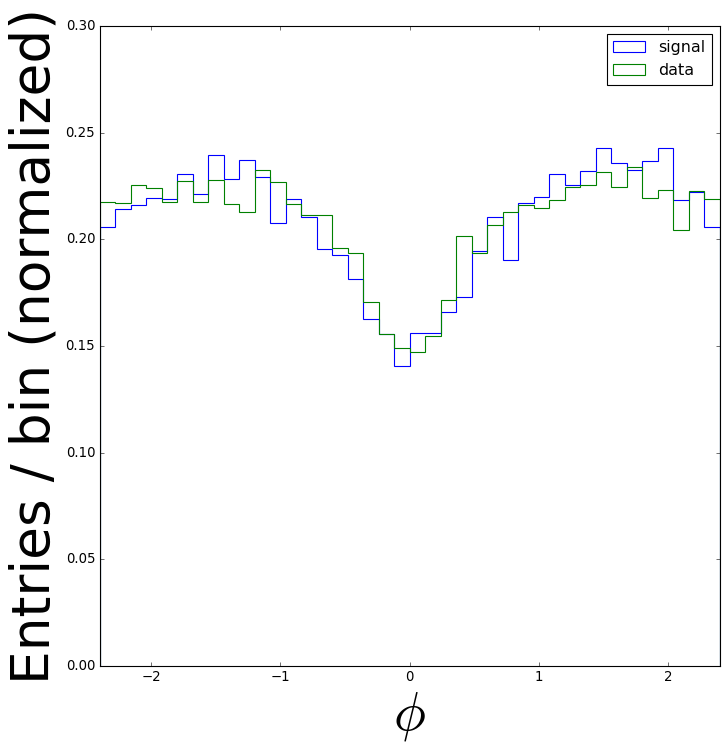

In [84]:
fig, ax = plt.subplots()
ax.hist(df_mu_gluglu.zgPhi, bins=40, range=[-2.4, 2.4], histtype='step', label='signal', density=True);
ax.hist(df_muon.zgPhi, bins=40, range=[-2.4, 2.4], histtype='step', label='data', density=True);
ax.set_xlabel(r'$\phi$');
ax.set_ylabel('Entries / bin (normalized)');
ax.legend(loc='upper right');
ax.set_xlim(-2.4, 2.4)
ax.set_ylim(0., 0.3)
plt.savefig('phi_reco.png', dpi=500)